# Teoría cuántica básica, Observables y Medidas

## Simule el primer sistema cuántico descrito en la sección 4.1.

El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

In [13]:
import numpy as np

# Definir el estado cuántico como un array de amplitudes
estado_cuantico = np.array([3, 7, 12, 8, 4])

# Elegir la posición a evaluar
posicion = 1

# Calcular la probabilidad de encontrar la partícula en la posición dada
amplitud_cuadrada = np.abs(estado_cuantico[posicion])**2
norma_cuadrada = np.sum(np.abs(estado_cuantico)**2)

if norma_cuadrada == 0:
    raise ValueError("La division entre 0 no esta definida.")

probabilidad = (amplitud_cuadrada / norma_cuadrada).item()
print(f"Punto 1:\nLa probabilidad de hallar la partícula en la posición {posicion} es: {probabilidad}%")

Punto 1:
La probabilidad de hallar la partícula en la posición 1 es: 0.17375886524822695%


2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [14]:
import numpy as np

# Definir el primer vector ket
vector_inicial = np.array([2, 4, 6, 8, 10, 12])

# Definir la posición de transición
posicion_transicion = 4

# Construir el segundo vector ket con la transición
vector_final = np.array([(vector_inicial[i] if i == posicion_transicion else 0) for i in range(len(vector_inicial))])

print("Punto 2:\nPrimer vector:", vector_inicial, "\nSegundo vector:", vector_final)

# Normalizar los vectores
vector_inicial = vector_inicial / np.linalg.norm(vector_inicial)
vector_final = vector_final / np.linalg.norm(vector_final)

# Calcular la probabilidad de transición
producto_interno = np.vdot(vector_final, vector_inicial)
probabilidad_transicion = (np.abs(producto_interno))**2

print(f"La probabilidad de transitar del primer vector al segundo es de: {probabilidad_transicion}%")

Punto 2:
Primer vector: [ 2  4  6  8 10 12] 
Segundo vector: [ 0  0  0  0 10  0]
La probabilidad de transitar del primer vector al segundo es de: 0.2747252747252748%


## COMPLETE LOS RETOS DE PROGRMACIÓN DEL CAPÍTULO 4. 

1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [15]:
import numpy as np

# Definir los vectores inicial y final
vector_inicial = np.array([0, 1, 0])  # Estado inicial
vector_final = np.array([0, 1, 1])  # Estado final

# Calcular la amplitud de transición usando el producto interno
amplitud_transicion = np.dot(vector_final.conj(), vector_inicial)

# Calcular la probabilidad de transición después de la observación
probabilidad_transicion = np.abs(amplitud_transicion)**2

print(f"La probabilidad de transición es: {probabilidad_transicion}")


La probabilidad de transición es: 1


2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [16]:
import numpy as np

def calcular_media_varianza(observable, estado):
    # Verificar si la matriz observable es hermitiana
    if not np.allclose(observable, observable.conj().T):
        return "Error: La matriz observable no es hermitiana"

    # Calcular la media del observable en el estado dado
    media_observable = np.dot(estado.conj().T, np.dot(observable, estado)).real

    # Calcular la varianza del observable
    estado_transformado = np.dot(observable, estado)
    varianza_observable = np.dot(estado.conj().T, np.dot(observable, estado_transformado)).real - media_observable ** 2

    return media_observable, varianza_observable

# Definir una matriz observable hermitiana y un vector ket
matriz_observable = np.array([[2, -1j], [1j, 3]]) 
vector_estado = np.array([np.sqrt(3)/3, np.sqrt(6)/3j])

# Calcular la media y la varianza
media, varianza = calcular_media_varianza(matriz_observable, vector_estado)

print(f"La media del observable es: {media.item()}")
print(f"La varianza del observable es: {varianza.item()}")

La media del observable es: 1.723857625084603
La varianza del observable es: 0.6476030138606879


3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [17]:
import numpy as np

def calcular_probabilidad_transicion(observable, estado):
    # Calcula los valores y vectores propios de la matriz observable
    valores_propios, vectores_propios = np.linalg.eig(observable)

    # Calcula las probabilidades de transición a los vectores propios
    probabilidades_transicion = np.abs(np.dot(vectores_propios.conj().T, estado)) ** 2

    return valores_propios, probabilidades_transicion

# Datos
observable = np.array([[2, 1], [1, 3]]) 
estado = np.array([[0], [1]])  

valores_propios, probabilidades_transicion = calcular_probabilidad_transicion(observable, estado)
print("Valores propios del observable:", valores_propios)
print("Probabilidades de transición a los vectores propios:", probabilidades_transicion)

Valores propios del observable: [1.38196601 3.61803399]
Probabilidades de transición a los vectores propios: [[0.2763932]
 [0.7236068]]


4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [18]:
import numpy as np

def evolucionar_estado(estado_inicial, operadores_unitarios):
    estado_resultante = estado_inicial
    for operador in operadores_unitarios:
        estado_resultante = np.dot(operador, estado_resultante)
    return estado_resultante

# Definir el estado inicial y las matrices unitarias
estado_inicial = np.array([0, 1])  
operadores_unitarios = [np.array([[0, -1j], [1j, 0]]), 
                         np.array([[0, 1], [1, 0]])]

# Calcular el estado final
estado_final = evolucionar_estado(estado_inicial, operadores_unitarios)
print("El estado final del sistema es:", estado_final)

El estado final del sistema es: [0.+0.j 0.-1.j]


## Realice los siguientes problemas e incluyalos como ejemplos

Modele en su librería los problemas.

# 4.3.1
Find all the possible states the system described in Exercise 4.2.2 can transition into after a measurement has been carried out.

In [21]:
import numpy as np

estado_inicial = np.array([1, 0])
Sx = np.array([[0, 1], [1, 0]])
estado_resultante = np.dot(Sx, estado_inicial)

# Cálculo de la probabilidad de spin up y spin down
probabilidad_spin_up = abs(estado_resultante[0])**2
probabilidad_spin_down = abs(estado_resultante[1])**2

print("Probabilidad de transición en spin up:", probabilidad_spin_up)
print("Probabilidad de transición en spin down:", probabilidad_spin_down)


Probabilidad de transición en spin up: 0
Probabilidad de transición en spin down: 1


# 4.3.2

Perform the same calculations as in the last example, using Exer
cise 4.3.1. Then draw the probability distribution of the eigenvalues as in the previous example.

Probabilidad de transición a spin up: 0
Probabilidad de transición a spin down: 1


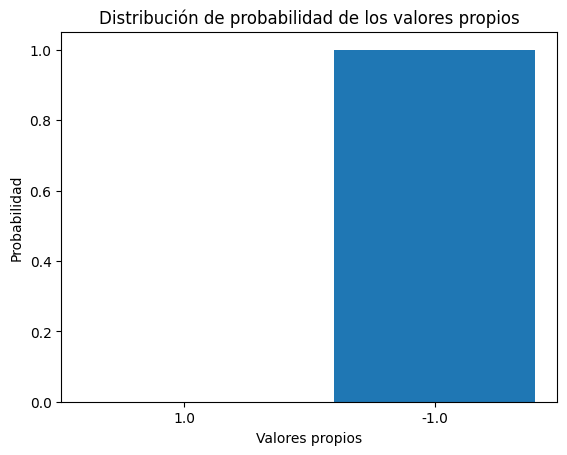

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el estado inicial
estado = np.array([1, 0])

# Definir la matriz del operador Sy
operador_sy = np.array([[0, 1], [1, 0]])
estado_final = np.dot(operador_sy, estado)

# Calcular las probabilidades de los estados resultantes
prob_up = np.abs(estado_final[0])**2
prob_down = np.abs(estado_final[1])**2

# Mostrar las probabilidades calculadas
print(f"Probabilidad de transición a spin up: {prob_up}")
print(f"Probabilidad de transición a spin down: {prob_down}")

# Obtener los valores propios del operador Sy
valores, _ = np.linalg.eig(operador_sy)

# Graficamos
plt.bar(range(len(valores)), np.abs(estado_final)**2, tick_label=valores)
plt.xlabel('Valores propios')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad de los valores propios')
plt.show()


# 4.4.1

Verify that


$$
U_1 =
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
\quad \text{and} \quad
U_2 =
\begin{bmatrix}
\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\
\frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2}
\end{bmatrix}
$$


are unitary matrices. Multiply them and verify that their product is also unitary.

In [25]:
import numpy as np

U1 = np.array([[0, 1], [1, 0]])
U2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]])

es_unitaria_U1 = np.allclose(np.eye(2), np.dot(U1.T.conj(), U1))
es_unitaria_U2 = np.allclose(np.eye(2), np.dot(U2.T.conj(), U2))

producto = np.dot(U1, U2)
es_unitario_producto = np.allclose(np.eye(2), np.dot(producto.T.conj(), producto))

print(f"U1 {'es' if es_unitaria_U1 else 'no es'} unitaria")
print(f"U2 {'es' if es_unitaria_U2 else 'no es'} unitaria")
print(f"El producto de U1 y U2 {'es' if es_unitario_producto else 'no es'} unitario")


U1 es unitaria
U2 es unitaria
El producto de U1 y U2 es unitario


# 4.4.2

Go back to Example 3.3.2 (quantum billiard ball), keep the same initial state vector
\begin{bmatrix} 1 & 0 & 0 & 0 \end{bmatrix}^T

but change the unitary map to


\begin{bmatrix}
0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 \\
\frac{i}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & 0 & 0 & \frac{i}{\sqrt{2}} \\
0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0
\end{bmatrix}



Determine the state of the system after three time steps. What is the probability of finding the quantum ball at point 3?

In [32]:
import numpy as np

mapa = np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
    [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
])

estado_inicial = np.array([1, 0, 0, 0])

estado_temp = np.dot(mapa, estado_inicial)
estado_temp = np.dot(mapa, estado_temp)
estado_final = np.dot(mapa, estado_temp)

probabilidad_punto = np.abs(estado_final[2])**2

print("Estado final después de 3 pasos:", estado_final)
print("Probabilidad de encontrar la bola cuántica en el punto 3:", probabilidad_punto)


Estado final después de 3 pasos: [ 0.    +0.j     -0.7071+0.7071j  0.    +0.j      0.    +0.j    ]
Probabilidad de encontrar la bola cuántica en el punto 3: 0.0


# Desarrolle e incluya en el Github una discusión de los ejercicios 4.5.2 y 4.5.3

## 4.5.2

Escribe el vector de estado genérico para el sistema de dos partículas con espín. Generalízalo a un sistema con *n* partículas (esto es importante: ¡será la realización física de los registros cuánticos!).

R/ El estado general de un sistema compuesto por dos partículas con espín, representado como

$$
|\Psi\rangle 
$$

se obtiene a partir del producto tensorial de los estados individuales de cada partícula:

$$
|\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle
$$


Para extender este concepto a un sistema de n particulas, solo tenemos que aplicar el producto tensorial a los vectores de esatdo de todas las particulas involucradas:


$$
|\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle \otimes \dots \otimes |\psi_n\rangle
$$


## 4.5.3

Asume el mismo escenario que en el ejemplo 4.5.2 y sea:

$$|\phi\rangle = |x_0\rangle \otimes |y_1\rangle + |x_1\rangle \otimes |y_1\rangle.$$


¿Es este estado separable?

R/ Para determinar si el estado dado es separable, verificamos si se puede escribir como el producto tensorial de dos estados individuales.

El estado es:

$$
|\phi\rangle = |x_0\rangle \otimes |y_1\rangle + |x_1\rangle \otimes |y_1\rangle.
$$


Si fuera separable, podriamos escribirlo como:

$$
|\phi\rangle = (a_0 |x_0\rangle + a_1 |x_1\rangle) \otimes (b_0 |y_0\rangle + b_1 |y_1\rangle).
$$


Pero en la expresión dada, el termino $$ |y_1\rangle$$ Es comun en ambos terminos. Por lo tanto factorizando:

$$
|\phi\rangle = (|x_0\rangle + |x_1\rangle) \otimes |y_1\rangle.
$$


Este es claramente un producto tensorial de:

$$
|x_0\rangle + |x_1\rangle, \quad |y_1\rangle
$$


Lo que significa que el estado es separable.